In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from PIL import Image

In [85]:
class grid():
    def __init__ (self, CFL):
    
        self.L = 10
        self.T = 10
        self.h = 0.1
        self.CFL = CFL
        self.tau = self.h * CFL
#         self.tau = 0.1

        self.xr = np.arange(0, (self.L + self.h/2) , self.h)
        self.tr = np.arange(0, (self.T + self.tau/2), self.tau)
        self.N = len(self.tr)
        self.M = len(self.xr)
    

In [86]:
grid_06 = grid(0.6)

In [87]:
f = lambda u: u**2/2
def F(Ucurr, Unext):
    S = np.mean([Ucurr, Unext])
    if Ucurr >= Unext:
        return f(Ucurr) if S >= 0 else f(Unext)
    else:
        return f(Ucurr) if Ucurr >= 0 else (f(Unext) if Unext <= 0 else 0)


In [88]:
Y = lambda grid, Uprev, Ucurr, Unext: Ucurr - grid.tau/grid.h * (Ucurr * (F(Ucurr, Unext) - F(Uprev, Ucurr)))

u0 = lambda n: np.sin(n)/10

In [89]:
u0 = lambda grid, x: np.sin(np.pi * x / grid.L)

In [90]:
def Godunov(grid):
    u = np.zeros([grid.N, grid.M])
#     u[0] = [u0(n) for n in range(grid.M)]
    u[0] = [u0(grid, x) for x in grid.xr]
    for i in range(grid.N - 1):
        u[i+1][0] = Y(grid, u[i][grid.M-1], u[i][0], u[i][1])
        for j in range(1, grid.M-1):
            u[i+1][j] = Y(grid, u[i][j-1], u[i][j], u[i][j+1])
        u[i+1][grid.M-1] = Y(grid, u[i][grid.M-2], u[i][grid.M-1], u[i][0])
        
    return u

In [91]:
data = Godunov(grid_06)

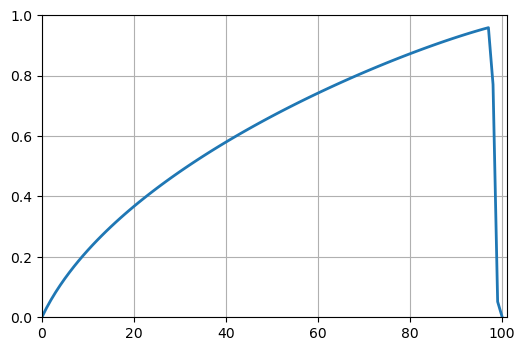

In [100]:
fig, ax = plt.subplots(dpi = 100)
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, len(data[0]))
ax.set_ylim(0, np.max(data))
ax.grid()

# Функция для обновления данных в каждом кадре анимации
def update(frame):
    line.set_data(np.arange(len(data[frame])), data[frame])
    return line,

# Создание анимации
ani = FuncAnimation(fig, update, frames=len(grid_06.xr), blit=True)

# Сохранение анимации в GIF файл
ani.save('animationGod.gif', writer='pillow')
